# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_names = []
cloudiness = []
countries = []
dates = []
humidity = []
lats_list = []
lngs_list = []
max_temps = []
wind_speeds = []
index_counter = 0
set_counter = 1

print('Beginning Data Retrieval ')
print('-----------------------------')

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{base_url}appid={weather_api_key}&units={units}&q='


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_names.append(response['name'])
        lats_list.append(response['coord']['lat'])
        lngs_list.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
            
        print(f'Processing Record {index_counter} of Set {set_counter} | {city}') 
  
    except(KeyError, IndexError):
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | bhuj
Processing Record 3 of Set 1 | half moon bay
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | indian head
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | nabire
Processing Record 13 of Set 1 | adilcevaz
City not found. Skipping...
Processing Record 14 of Set 1 | skoghall
Processing Record 15 of Set 1 | butembo
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | havre-saint-pierre
Processing Record 18 of Set 1 | rumford
Processing Record 19 of Set 1 | necochea
Processing Record 20 of Set 1 | hambantota
Processing Record 21 of Set 1 | diplo
Processing Record 22

City not found. Skipping...
Processing Record 37 of Set 4 | gigmoto
Processing Record 38 of Set 4 | narsaq
Processing Record 39 of Set 4 | riverton
Processing Record 40 of Set 4 | shirgaon
Processing Record 41 of Set 4 | moose factory
Processing Record 42 of Set 4 | mercedes
Processing Record 43 of Set 4 | nishihara
Processing Record 44 of Set 4 | bambanglipuro
Processing Record 45 of Set 4 | davila
Processing Record 46 of Set 4 | yar-sale
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | port alfred
Processing Record 50 of Set 4 | barabai
City not found. Skipping...
Processing Record 0 of Set 5 | baculin
Processing Record 1 of Set 5 | mahebourg
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | freeport
Processing Record 4 of Set 5 | korem
Processing Record 5 of Set 5 | grand-santi
Processing Record 6 of Set 5 | tarko-sale
Processing Record 7 of Set 5 | santa maria
Processing Record 8 of 

Processing Record 23 of Set 8 | mkushi
Processing Record 24 of Set 8 | praia
Processing Record 25 of Set 8 | maarianhamina
Processing Record 26 of Set 8 | zaranj
Processing Record 27 of Set 8 | sorong
Processing Record 28 of Set 8 | port augusta
Processing Record 29 of Set 8 | impfondo
Processing Record 30 of Set 8 | fort nelson
Processing Record 31 of Set 8 | macrohon
Processing Record 32 of Set 8 | limon
Processing Record 33 of Set 8 | chapais
Processing Record 34 of Set 8 | treinta y tres
Processing Record 35 of Set 8 | la ronge
Processing Record 36 of Set 8 | camacha
Processing Record 37 of Set 8 | nouakchott
City not found. Skipping...
Processing Record 38 of Set 8 | tianpeng
Processing Record 39 of Set 8 | coquimbo
Processing Record 40 of Set 8 | saskylakh
City not found. Skipping...
Processing Record 41 of Set 8 | roma
Processing Record 42 of Set 8 | terekli-mekteb
Processing Record 43 of Set 8 | soure
Processing Record 44 of Set 8 | joshimath
Processing Record 45 of Set 8 | san

Processing Record 8 of Set 12 | nisia floresta
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather = pd.DataFrame({ 
                "City" : city_names,
                "Lat" : lats_list,
                "Lng" : lngs_list,
                "Max Temp" : max_temps,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speeds,
                "Country" : countries,
                "Date" : dates
})

weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,56.10,76,100,8.93,RU,1629099479
1,Bhuj,23.2667,69.6667,91.67,45,46,11.99,IN,1629099479
2,Half Moon Bay,37.4636,-122.4286,67.82,87,1,0.00,US,1629099479
3,Albany,42.6001,-73.9662,58.39,91,96,2.98,US,1629099330
4,Norman Wells,65.2820,-126.8329,46.44,100,20,4.61,CA,1629099480


In [5]:
weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,20.805098,18.374450,70.761002,68.391916,56.785589,8.046432,1.629100e+09
std,33.170736,88.161002,13.653998,22.498654,40.201163,5.326992,9.494728e+01
min,-54.800000,-175.200000,32.830000,7.000000,0.000000,0.000000,1.629099e+09
25%,-6.134900,-59.430700,61.480000,54.000000,11.000000,3.910000,1.629100e+09
50%,25.208800,26.400000,72.950000,74.000000,73.000000,6.980000,1.629100e+09
75%,49.249900,89.301100,80.580000,86.000000,98.000000,11.500000,1.629100e+09
max,78.218600,178.416700,108.880000,100.000000,100.000000,30.600000,1.629100e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Max humidity is 100 so these steps are not needed

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Creating csv of weather data
weather.to_csv('output_data/cities.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

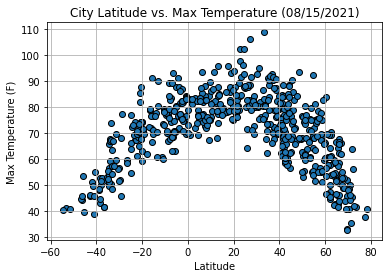

In [10]:
plt.scatter(weather['Lat'],weather['Max Temp'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (08/15/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/City Latitude vs. Max Temperature.png')

This plot is showing us that the highest temperatures are found between the equator and 20 degrees north

## Latitude vs. Humidity Plot

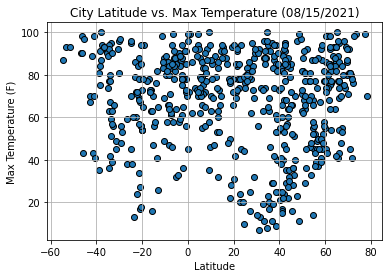

In [11]:
plt.scatter(weather['Lat'],weather['Humidity'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (08/15/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/City Latitude vs. Humidity.png')

This plot is showing us that Max Humidity doesn't vary much however Min Humidity does drop as you get closer to the equator, however at the equator humidity appears to be high as well

## Latitude vs. Cloudiness Plot

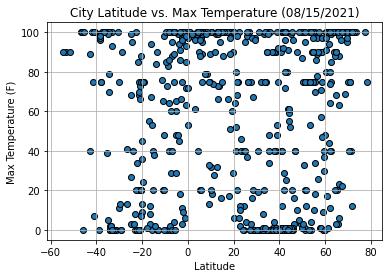

In [12]:
plt.scatter(weather['Lat'],weather['Cloudiness'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (08/15/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/City Latitude vs. Cloudiness.png')

There doesn't appear to be any correlation between lattitude and cloudiness, however the cloudiness data might need to be looked at as it does appear to form lines

## Latitude vs. Wind Speed Plot

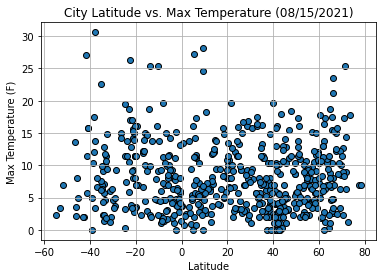

In [13]:
plt.scatter(weather['Lat'],weather['Wind Speed'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (08/15/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/City Latitude vs. Wind Speed.png')

Wind speeds do not appear to be affected by latitude

## Linear Regression

In [14]:
# Define northern/southern hemispheres
n_hemisphere = weather.loc[weather['Lat'] >= 0]
s_hemisphere = weather.loc[weather['Lat'] < 0]

# Define function for creating linreg and plot
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define fuction for annotating
def annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=15,color='red')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

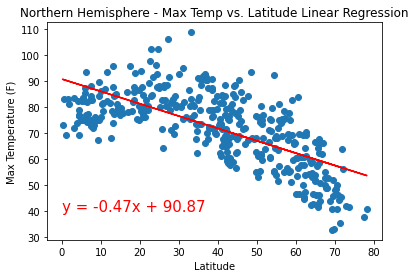

In [15]:
# Call functions
lineq = linear_regression(n_hemisphere['Lat'], n_hemisphere['Max Temp'])
annotate(lineq, 0, 40)

# Label plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save
plt.savefig('output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

The furthur from the equator and closer to the pole you get the colder it gets

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

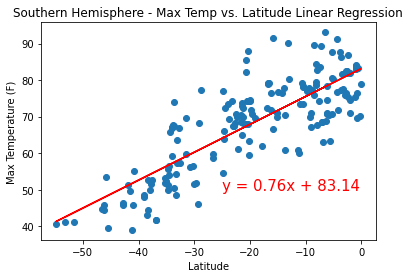

In [16]:
# Call functions
lineq = linear_regression(s_hemisphere['Lat'], s_hemisphere['Max Temp'])
annotate(lineq, -25, 50)

# Label plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save
plt.savefig('output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

As with the previous plot, the furthur from the equator and closer to the pole you get the colder it gets

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

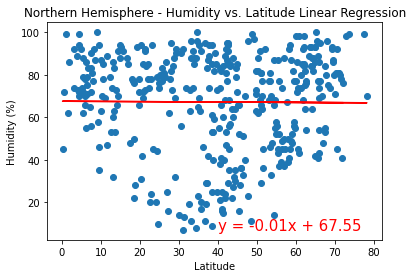

In [17]:
# Call functions
lineq = linear_regression(n_hemisphere['Lat'], n_hemisphere['Humidity'])
annotate(lineq, 40, 7)

# Label plot
title = 'Northern Hemisphere - Humidity vs. Latitude Linear Regression'
plt.title(f'{title}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save
plt.savefig(f'output_data/{title}.png')

There does appear to be a slight correlation between humidity and lattitude, however as most of the data is in the upper percentages I believe that other factors will affect more change on humidity than lattitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

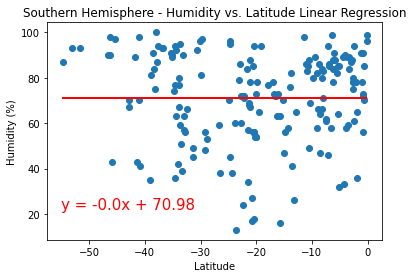

In [18]:
# Call functions
lineq = linear_regression(s_hemisphere['Lat'], s_hemisphere['Humidity'])
annotate(lineq, -55, 22)

# Label plot
title = 'Southern Hemisphere - Humidity vs. Latitude Linear Regression'
plt.title(f'{title}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save
plt.savefig(f'output_data/{title}.png')

Similar to the previous plot, as you get closer to the equator the humidity drops slightly however there are still very high and very low humidities accross the board

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

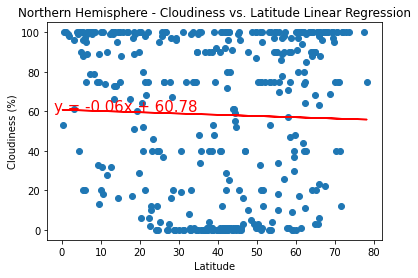

In [19]:
# Call functions
lineq = linear_regression(n_hemisphere['Lat'], n_hemisphere['Cloudiness'])
annotate(lineq, -2, 60)

# Label plot
title = 'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression'
plt.title(f'{title}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save
plt.savefig(f'output_data/{title}.png')

There does appear to be a slight correlation between lattitude and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

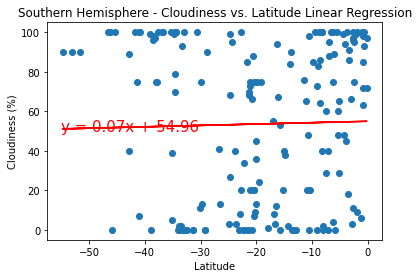

In [20]:
# Call functions
lineq = linear_regression(s_hemisphere['Lat'], s_hemisphere['Cloudiness'])
annotate(lineq, -55, 50)

# Label plot
title = 'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression'
plt.title(f'{title}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save
plt.savefig(f'output_data/{title}.png')

As with the Northern Hemisphere there is a slight correlation between cloudiness and lattitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

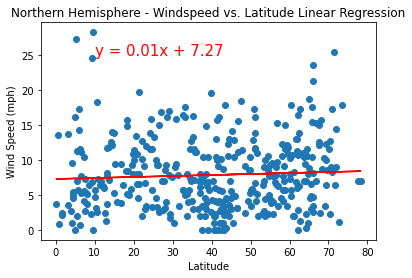

In [21]:
# Call functions
lineq = linear_regression(n_hemisphere['Lat'], n_hemisphere['Wind Speed'])
annotate(lineq, 10, 25)

# Label plot
title = 'Northern Hemisphere - Windspeed vs. Latitude Linear Regression'
plt.title(f'{title}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save
plt.savefig(f'output_data/{title}.png')

There does not appear to be any signifigant increase in wind speed based on lattitude in the Northern Hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

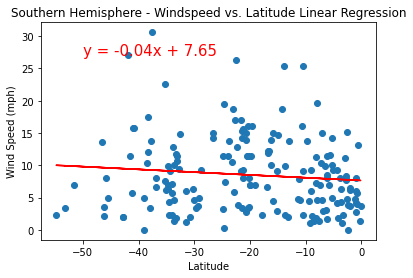

In [22]:
# Call functions
lineq = linear_regression(s_hemisphere['Lat'], s_hemisphere['Wind Speed'])
annotate(lineq, -50, 27)

# Label plot
title = 'Southern Hemisphere - Windspeed vs. Latitude Linear Regression'
plt.title(f'{title}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save
plt.savefig(f'output_data/{title}.png')

There is a small correlation in wind speed and lattitude in the southern hemisphere however this might be due to there being less data from the osuthern hemisphere than from the northern hemisphere